## 2. Явный метод Рунге-Кутта 4-го порядка

### 2.1. Уравнение Ван-дер-Поля

а) Уравнение Ван-дер-Поля:

\begin{equation*}
 \begin{cases}
   \frac{dy_1}{dt} = -a (\frac{y_{1}^3}{3} - y_1) - a y_2,\\
   \frac{dy_2}{dt} = -y_1.
 \end{cases}
\end{equation*}

Сделаем замену: $u = y_1, v = y_2$. Используем явный метод Рунге-Кутта 4-го порядка для уравнения $y' = f(x, y)$:

\begin{equation*}
 y_{k+1} = y_k + \frac{\tau}{6} (k_1 + 2 k_2 + 2 k_3 + k_4), \; где:\\
 k_1 = f(x_k, y_k);\\
 k_2 = f(x_k + \frac{\tau}{2}, y_k + \frac{\tau}{2} k_1);\\
 k_3 = f(x_k + \frac{\tau}{2}, y_k + \frac{\tau}{2} k_2);\\
 k_4 = f(x_k + \tau, y_k + \tau k_3).
\end{equation*}

Получили искомые формулы решения системы.

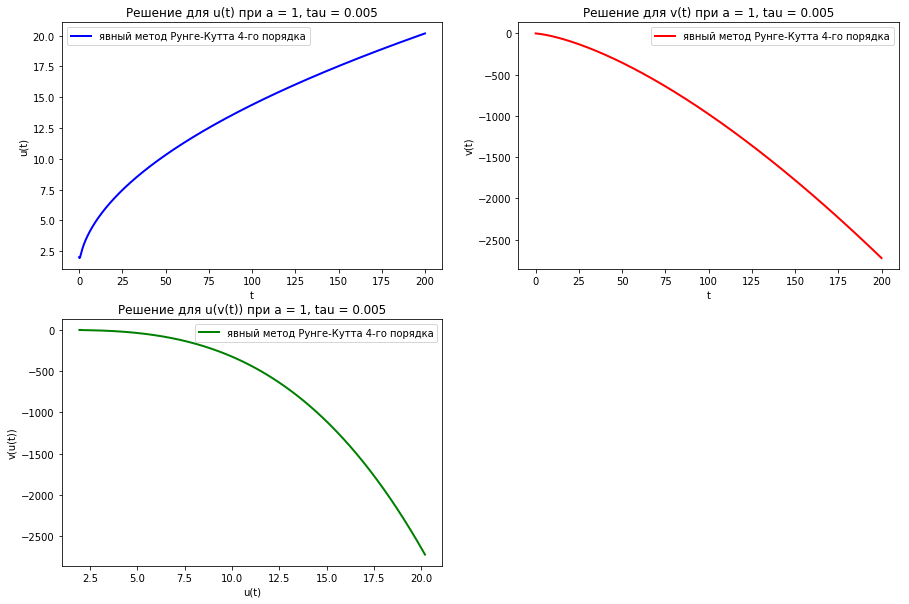

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*2 #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
a = 1
tau = 5*10**-3  # use only tau <= 5*10**-3 when a = 1 otherwise overflow error!

N = int((t_max - t_min) / tau)

u = np.zeros(N)
v = np.zeros(N)

u[0] = 2
v[0] = 0

def f(u, v):
  return -a * (u**3 / 3 - u) - a * v

def g(u, v):
  return -u

for i in range(0, N-1):
    k_1 = f(u[i], v[i])
    k_2 = f(u[i] + tau / 2, v[i] + tau / 2 * k_1)
    k_3 = f(u[i] + tau / 2, v[i] + tau / 2 * k_2)
    k_4 = f(u[i] + tau, v[i] + tau * k_3)
    u[i+1] = u[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
    
    k_1 = g(u[i], v[i])
    k_2 = g(u[i] + tau / 2, v[i] + tau / 2 * k_1)
    k_3 = g(u[i] + tau / 2, v[i] + tau / 2 * k_2)
    k_4 = g(u[i] + tau, v[i] + tau * k_3)
    v[i+1] = v[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

t = np.linspace(t_min, t_max, num=N)

ax = plt.subplot(2,2,1)
plt.plot(t, u, color='blue', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
ax.set_xlabel('t')
ax.set_ylabel('u(t)')
ax.legend()

ax = plt.subplot(2,2,2)
plt.plot(t, v, color='red', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

ax = plt.subplot(2,2,3)
plt.plot(u, v, color='green', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для u(v(t)) при a = {a}, tau = {tau}")
ax.set_xlabel('u(t)')
ax.set_ylabel('v(u(t))')
ax.legend()


plt.savefig('images/a/2.1.main.png')

#### Графики решений при различных $a$

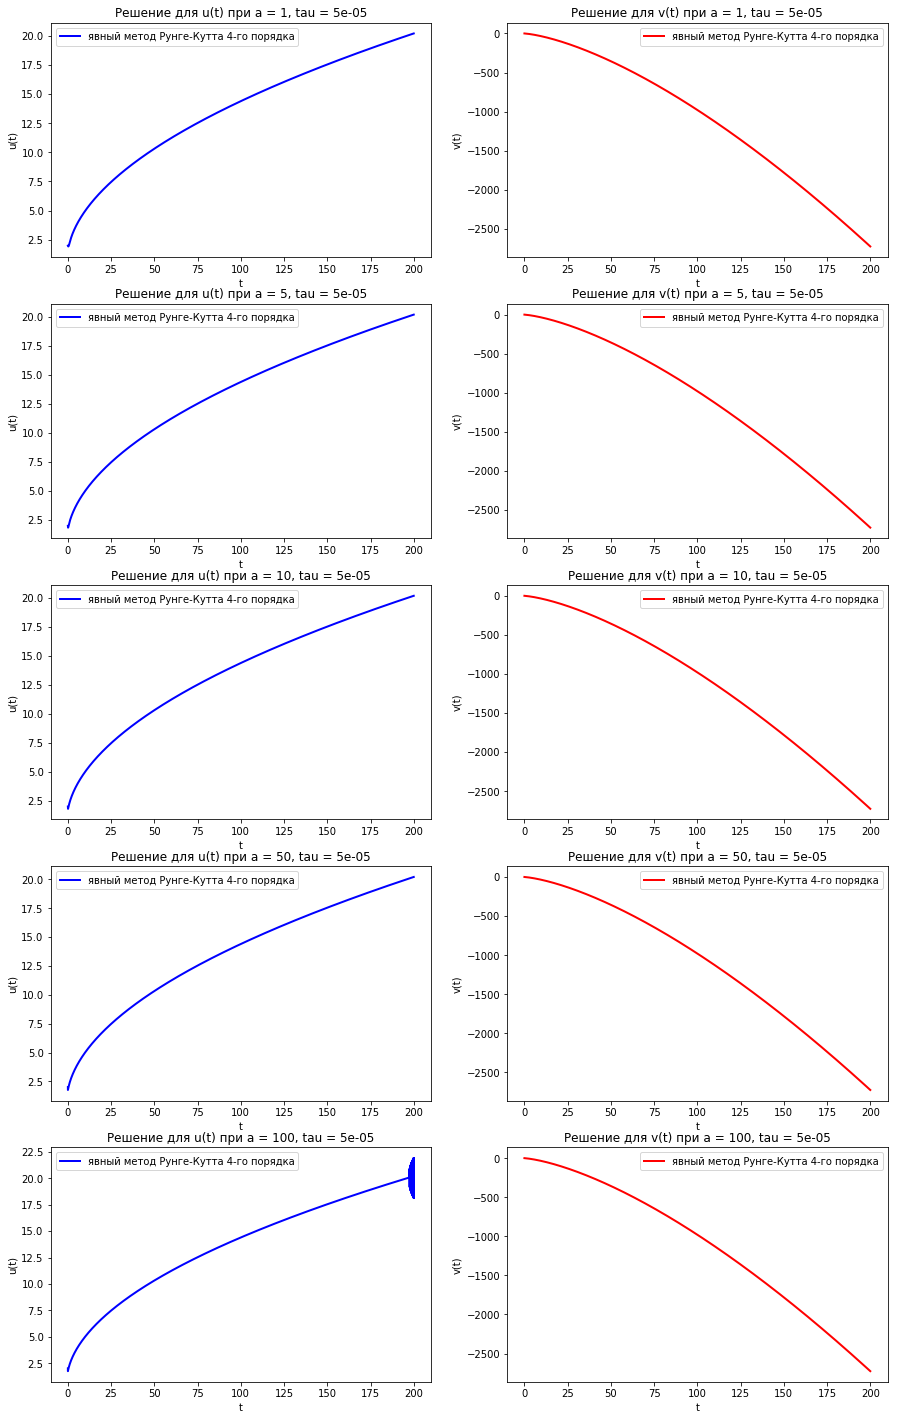

In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# Different aas
aas = [10**0, 5*10**0, 10**1, 5*10**1, 10**2]

len_aas = len(aas)

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*len_aas #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
tau = 5*10**-5  # use only tau <= 5*10**-3 otherwise overflow error!

cycles = 1
for a in aas:
    N = int((t_max - t_min) / tau)

    u = np.zeros(N)
    v = np.zeros(N)

    u[0] = 2
    v[0] = 0
    
    def f(u, v):
      return -a * (u**3 / 3 - u) - a * v

    def g(u, v):
      return -u

    for i in range(0, N-1):
        k_1 = f(u[i], v[i])
        k_2 = f(u[i] + tau / 2, v[i] + tau / 2 * k_1)
        k_3 = f(u[i] + tau / 2, v[i] + tau / 2 * k_2)
        k_4 = f(u[i] + tau, v[i] + tau * k_3)
        u[i+1] = u[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

        k_1 = g(u[i], v[i])
        k_2 = g(u[i] + tau / 2, v[i] + tau / 2 * k_1)
        k_3 = g(u[i] + tau / 2, v[i] + tau / 2 * k_2)
        k_4 = g(u[i] + tau, v[i] + tau * k_3)
        v[i+1] = v[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

    t = np.linspace(t_min, t_max, num=N)

    ax = plt.subplot(len_aas,2,cycles)
    plt.plot(t, u, color='blue', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    ax.legend()

    ax = plt.subplot(len_aas,2,cycles+1)
    plt.plot(t, v, color='red', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('v(t)')
    ax.legend()

    cycles += 2

plt.savefig('images/a/2.2.a.png')

#### Графики решений при различных $\tau$

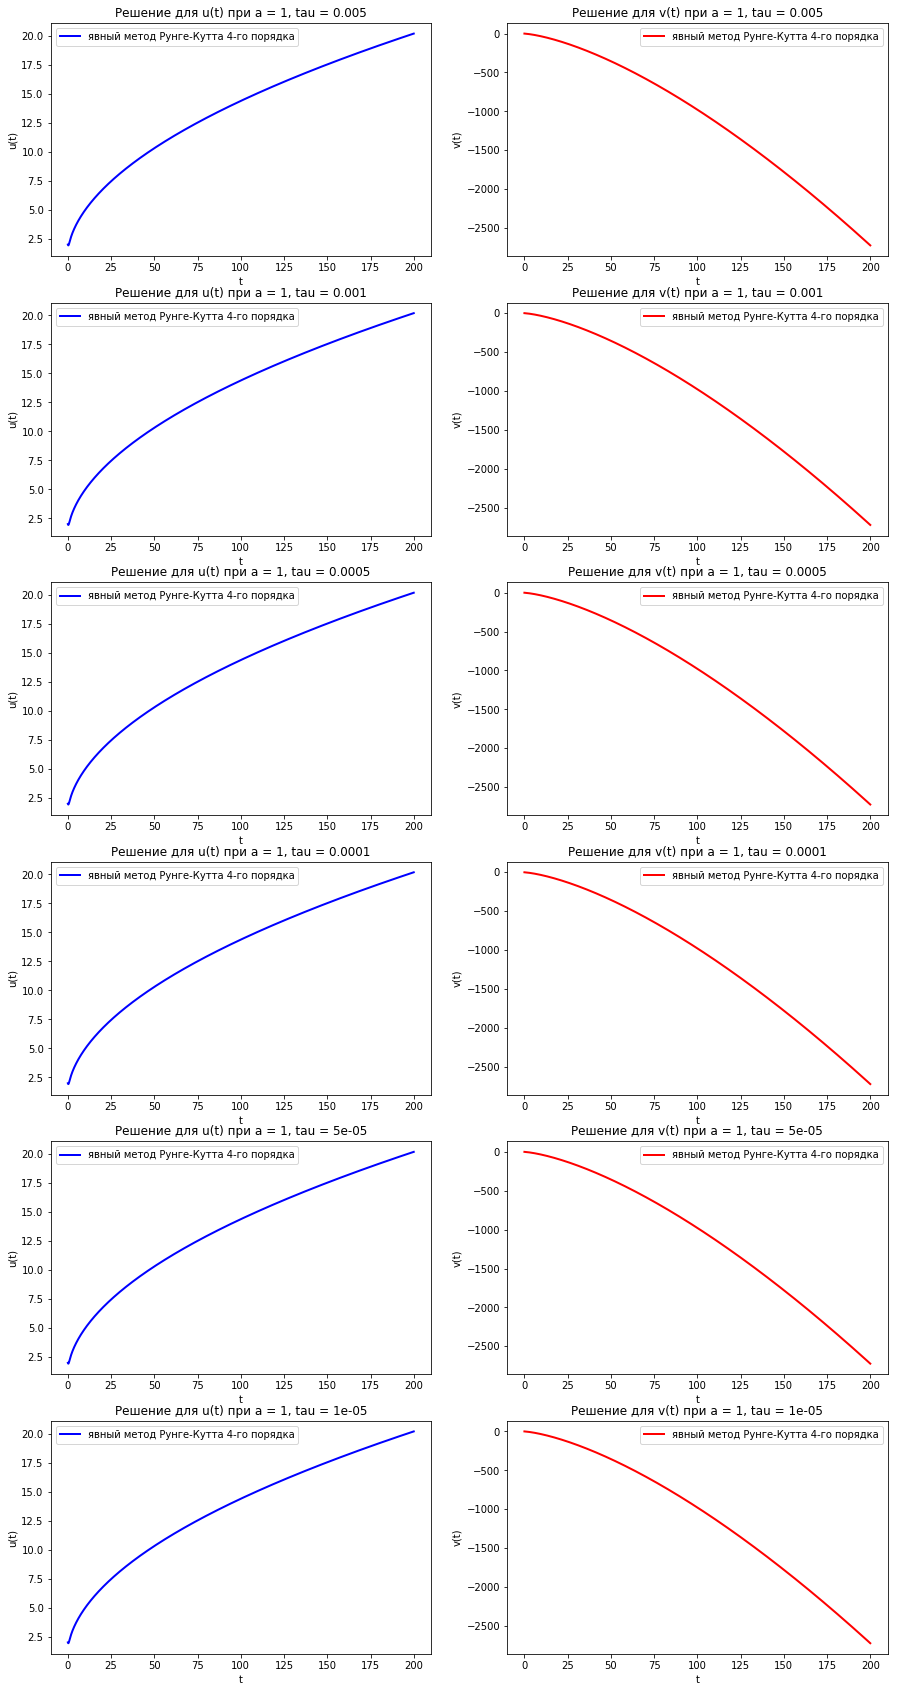

In [14]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# Different taus
taus = [5*10**-3, 10**-3, 5*10**-4, 10**-4, 5*10**-5, 10**-5]  # use only tau <= 5*10**-3 when a = 1 otherwise overflow error!

len_taus = len(taus)

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*len_taus #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
a = 1

cycles = 1
for tau in taus:
    N = int((t_max - t_min) / tau)

    u = np.zeros(N)
    v = np.zeros(N)

    u[0] = 2
    v[0] = 0

    def f(u, v):
      return -a * (u**3 / 3 - u) - a * v

    def g(u, v):
      return -u

    for i in range(0, N-1):
        k_1 = f(u[i], v[i])
        k_2 = f(u[i] + tau / 2, v[i] + tau / 2 * k_1)
        k_3 = f(u[i] + tau / 2, v[i] + tau / 2 * k_2)
        k_4 = f(u[i] + tau, v[i] + tau * k_3)
        u[i+1] = u[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

        k_1 = g(u[i], v[i])
        k_2 = g(u[i] + tau / 2, v[i] + tau / 2 * k_1)
        k_3 = g(u[i] + tau / 2, v[i] + tau / 2 * k_2)
        k_4 = g(u[i] + tau, v[i] + tau * k_3)
        v[i+1] = v[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

    t = np.linspace(t_min, t_max, num=N)

    ax = plt.subplot(len_taus,2,cycles)
    plt.plot(t, u, color='blue', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    ax.legend()

    ax = plt.subplot(len_taus,2,cycles+1)
    plt.plot(t, v, color='red', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('v(t)')
    ax.legend()

    cycles += 2

plt.savefig('images/a/2.3.tau.png')

## 2.2. Уравнение Бонгоффера – Ван-дер-Поля

б) Уравнение Бонгоффера – Ван-дер-Поля:

\begin{equation*}
 \begin{cases}
   \frac{dy_1}{dt} = -a (\frac{y_{1}^3}{3} - y_1) + a y_2,\\
   \frac{dy_2}{dt} = -y_1 - b y_2 + c.
 \end{cases}
\end{equation*}

Сделаем замену: $u = y_1, v = y_2$. Используем явный метод Рунге-Кутта 4-го порядка. Получили искомые формулы решения системы.

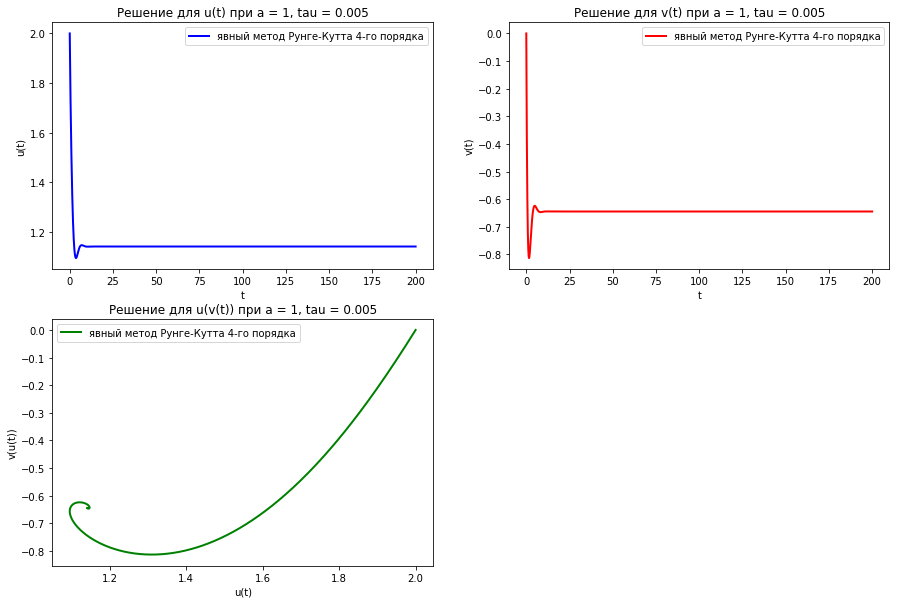

In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*2 #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
a = 1
b = 1
c = 0.5
tau = 5*10**-3  # use only tau <= 5*10**-3 when a = 1 otherwise overflow error!

N = int((t_max - t_min) / tau)

u = np.zeros(N)
v = np.zeros(N)

u[0] = 2
v[0] = 0

def f(u, v):
  return -a * (u**3 / 3 - u) + a * v

def g(u, v):
  return -u - b * v + c

for i in range(0, N-1):
    k_1 = f(u[i], v[i])
    k_2 = f(u[i] + tau / 2, v[i] + tau / 2 * k_1)
    k_3 = f(u[i] + tau / 2, v[i] + tau / 2 * k_2)
    k_4 = f(u[i] + tau, v[i] + tau * k_3)
    u[i+1] = u[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
    
    k_1 = g(u[i], v[i])
    k_2 = g(u[i] + tau / 2, v[i] + tau / 2 * k_1)
    k_3 = g(u[i] + tau / 2, v[i] + tau / 2 * k_2)
    k_4 = g(u[i] + tau, v[i] + tau * k_3)
    v[i+1] = v[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

t = np.linspace(t_min, t_max, num=N)

ax = plt.subplot(2,2,1)
plt.plot(t, u, color='blue', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
ax.set_xlabel('t')
ax.set_ylabel('u(t)')
ax.legend()

ax = plt.subplot(2,2,2)
plt.plot(t, v, color='red', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

ax = plt.subplot(2,2,3)
plt.plot(u, v, color='green', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для u(v(t)) при a = {a}, tau = {tau}")
ax.set_xlabel('u(t)')
ax.set_ylabel('v(u(t))')
ax.legend()


plt.savefig('images/b/2.1.main.png')

#### Графики решений при различных $a$

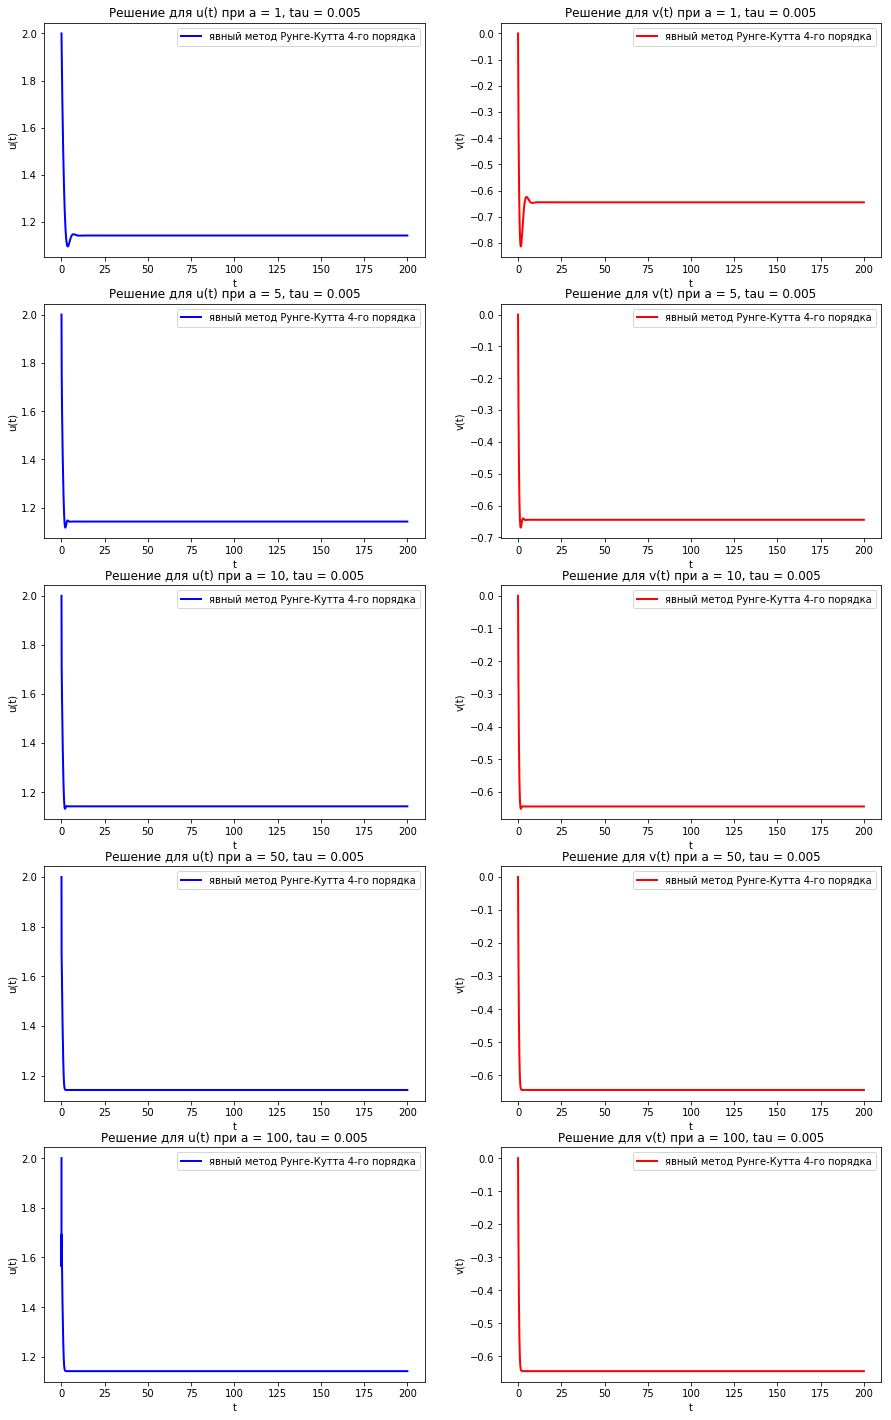

In [5]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# Different aas
aas = [10**0, 5*10**0, 10**1, 5*10**1, 10**2]

len_aas = len(aas)

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*len_aas #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
b = 1
c = 0.5
tau = 5*10**-3  # use only tau <= 5*10**-3 otherwise overflow error!

cycles = 1
for a in aas:
    N = int((t_max - t_min) / tau)

    u = np.zeros(N)
    v = np.zeros(N)

    u[0] = 2
    v[0] = 0
    
    def f(u, v):
      return -a * (u**3 / 3 - u) + a * v

    def g(u, v):
      return -u - b * v + c

    for i in range(0, N-1):
        k_1 = f(u[i], v[i])
        k_2 = f(u[i] + tau / 2, v[i] + tau / 2 * k_1)
        k_3 = f(u[i] + tau / 2, v[i] + tau / 2 * k_2)
        k_4 = f(u[i] + tau, v[i] + tau * k_3)
        u[i+1] = u[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

        k_1 = g(u[i], v[i])
        k_2 = g(u[i] + tau / 2, v[i] + tau / 2 * k_1)
        k_3 = g(u[i] + tau / 2, v[i] + tau / 2 * k_2)
        k_4 = g(u[i] + tau, v[i] + tau * k_3)
        v[i+1] = v[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

    t = np.linspace(t_min, t_max, num=N)

    ax = plt.subplot(len_aas,2,cycles)
    plt.plot(t, u, color='blue', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    ax.legend()

    ax = plt.subplot(len_aas,2,cycles+1)
    plt.plot(t, v, color='red', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('v(t)')
    ax.legend()

    cycles += 2

plt.savefig('images/b/2.2.a.png')

#### Графики решений при различных $\tau$

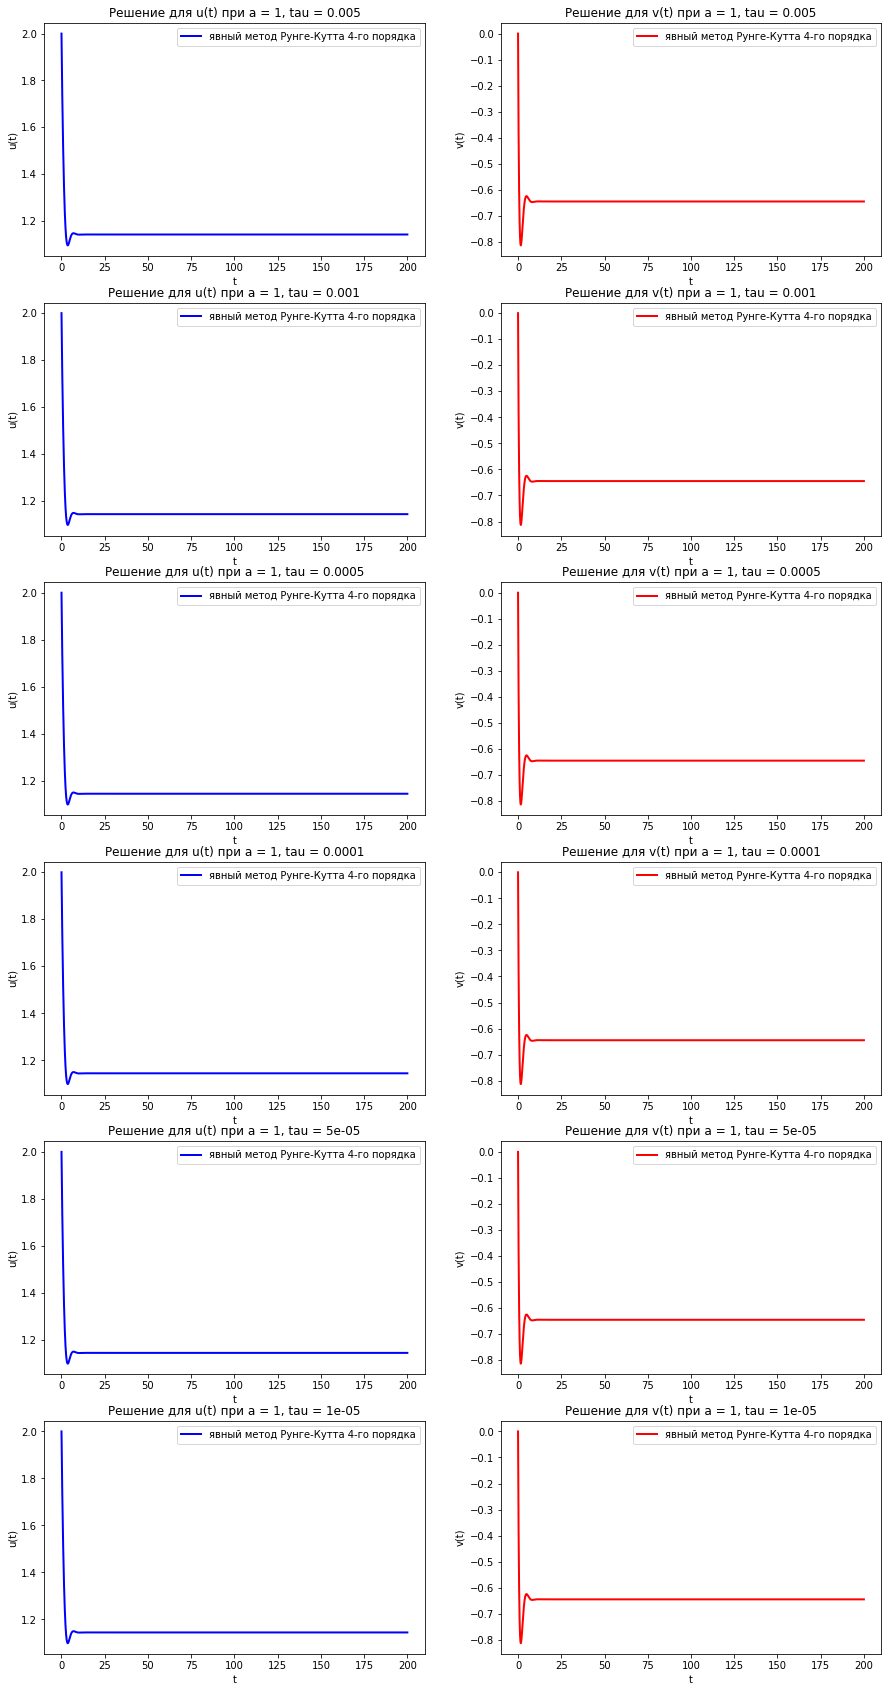

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# Different taus
taus = [5*10**-3, 10**-3, 5*10**-4, 10**-4, 5*10**-5, 10**-5]  # use only tau <= 5*10**-3 when a = 1 otherwise overflow error!

len_taus = len(taus)

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*len_taus #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
a = 1
b = 1
c = 0.5

cycles = 1
for tau in taus:
    N = int((t_max - t_min) / tau)

    u = np.zeros(N)
    v = np.zeros(N)

    u[0] = 2
    v[0] = 0

    def f(u, v):
      return -a * (u**3 / 3 - u) + a * v

    def g(u, v):
      return -u - b * v + c

    for i in range(0, N-1):
        k_1 = f(u[i], v[i])
        k_2 = f(u[i] + tau / 2, v[i] + tau / 2 * k_1)
        k_3 = f(u[i] + tau / 2, v[i] + tau / 2 * k_2)
        k_4 = f(u[i] + tau, v[i] + tau * k_3)
        u[i+1] = u[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

        k_1 = g(u[i], v[i])
        k_2 = g(u[i] + tau / 2, v[i] + tau / 2 * k_1)
        k_3 = g(u[i] + tau / 2, v[i] + tau / 2 * k_2)
        k_4 = g(u[i] + tau, v[i] + tau * k_3)
        v[i+1] = v[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

    t = np.linspace(t_min, t_max, num=N)

    ax = plt.subplot(len_taus,2,cycles)
    plt.plot(t, u, color='blue', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    ax.legend()

    ax = plt.subplot(len_taus,2,cycles+1)
    plt.plot(t, v, color='red', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('v(t)')
    ax.legend()

    cycles += 2

plt.savefig('images/b/2.3.tau.png')

## 2.3. Неавтономное уравнение Ван-дер-Поля, траектория-«утка»

в) Неавтономное уравнение Ван-дер-Поля, траектория-«утка»:

\begin{equation*}
 \begin{cases}
   \frac{dy_1}{dt} = -a (\frac{y_{1}^3}{3} - y_1) + a y_2,\\
   \frac{dy_2}{dt} = -y_1 + A cos(\omega t).
 \end{cases}
\end{equation*}

Сделаем замену: $u = y_1, v = y_2$. Используем явный метод Рунге-Кутта 4-го порядка. Получили искомые формулы решения системы.

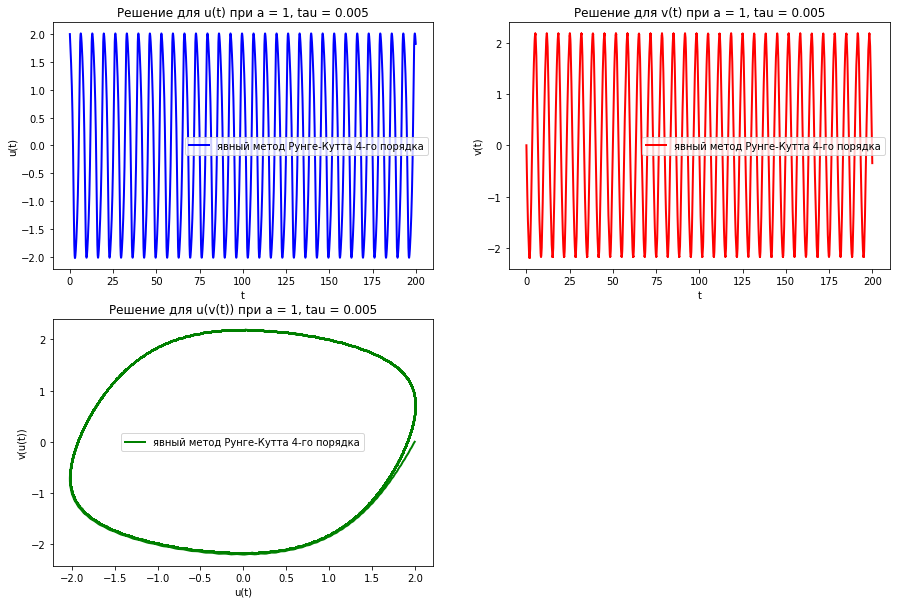

In [7]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*2 #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
a = 1
A = 0.5
omega = 100
tau = 5*10**-3  # use only tau <= 5*10**-3 when a = 1 otherwise overflow error!

N = int((t_max - t_min) / tau)

u = np.zeros(N)
v = np.zeros(N)

u[0] = 2
v[0] = 0

def f(u, v):
  return -a * (u**3 / 3 - u) + a * v

def g(u, v, t):
  return -u + A * math.cos(omega * t)

for i in range(0, N-1):
    t = (i + 1) * tau
    
    k_1 = f(u[i], v[i])
    k_2 = f(u[i] + tau / 2, v[i] + tau / 2 * k_1)
    k_3 = f(u[i] + tau / 2, v[i] + tau / 2 * k_2)
    k_4 = f(u[i] + tau, v[i] + tau * k_3)
    u[i+1] = u[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
    
    k_1 = g(u[i], v[i], t)
    k_2 = g(u[i] + tau / 2, v[i] + tau / 2 * k_1, t)
    k_3 = g(u[i] + tau / 2, v[i] + tau / 2 * k_2, t)
    k_4 = g(u[i] + tau, v[i] + tau * k_3, t)
    v[i+1] = v[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

t = np.linspace(t_min, t_max, num=N)

ax = plt.subplot(2,2,1)
plt.plot(t, u, color='blue', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
ax.set_xlabel('t')
ax.set_ylabel('u(t)')
ax.legend()

ax = plt.subplot(2,2,2)
plt.plot(t, v, color='red', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

ax = plt.subplot(2,2,3)
plt.plot(u, v, color='green', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для u(v(t)) при a = {a}, tau = {tau}")
ax.set_xlabel('u(t)')
ax.set_ylabel('v(u(t))')
ax.legend()


plt.savefig('images/c/2.1.main.png')

#### Графики решений при различных $\omega$

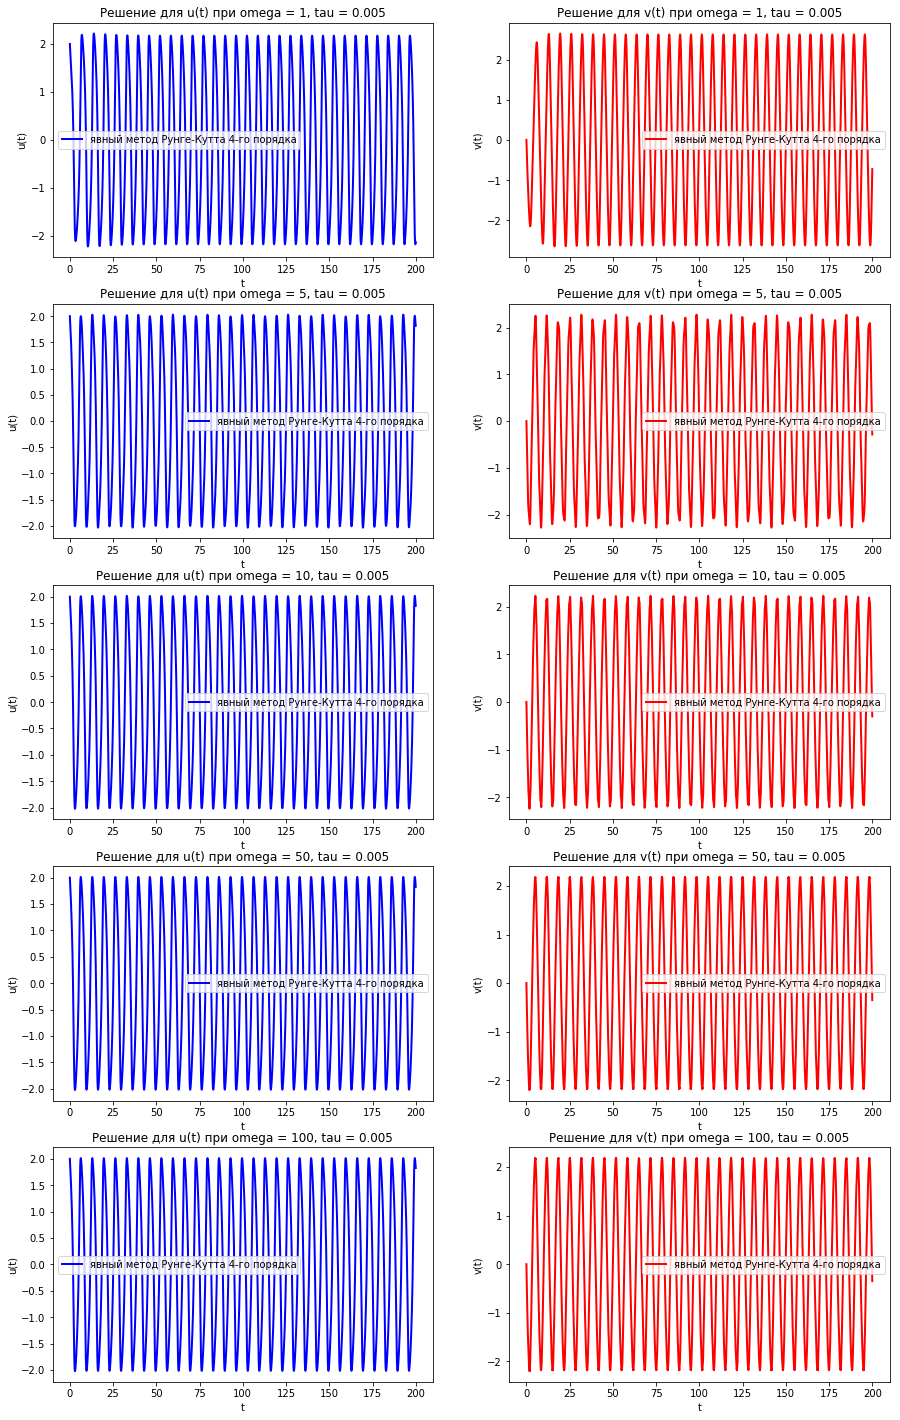

In [8]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# Different omegas
omegas = [10**0, 5*10**0, 10**1, 5*10**1, 10**2]

len_omegas = len(omegas)

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*len_omegas #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
a = 1
A = 0.5
tau = 5*10**-3  # use only tau <= 5*10**-3 otherwise overflow error!

cycles = 1
for omega in omegas:
    N = int((t_max - t_min) / tau)

    u = np.zeros(N)
    v = np.zeros(N)

    u[0] = 2
    v[0] = 0

    def f(u, v):
      return -a * (u**3 / 3 - u) + a * v

    def g(u, v, t):
      return -u + A * math.cos(omega * t)

    for i in range(0, N-1):
        t = (i + 1) * tau

        k_1 = f(u[i], v[i])
        k_2 = f(u[i] + tau / 2, v[i] + tau / 2 * k_1)
        k_3 = f(u[i] + tau / 2, v[i] + tau / 2 * k_2)
        k_4 = f(u[i] + tau, v[i] + tau * k_3)
        u[i+1] = u[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

        k_1 = g(u[i], v[i], t)
        k_2 = g(u[i] + tau / 2, v[i] + tau / 2 * k_1, t)
        k_3 = g(u[i] + tau / 2, v[i] + tau / 2 * k_2, t)
        k_4 = g(u[i] + tau, v[i] + tau * k_3, t)
        v[i+1] = v[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

    t = np.linspace(t_min, t_max, num=N)

    ax = plt.subplot(len_omegas,2,cycles)
    plt.plot(t, u, color='blue', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для u(t) при omega = {omega}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    ax.legend()

    ax = plt.subplot(len_omegas,2,cycles+1)
    plt.plot(t, v, color='red', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для v(t) при omega = {omega}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('v(t)')
    ax.legend()

    cycles += 2

plt.savefig('images/c/2.2.omega.png')

#### Графики решений при различных $\tau$

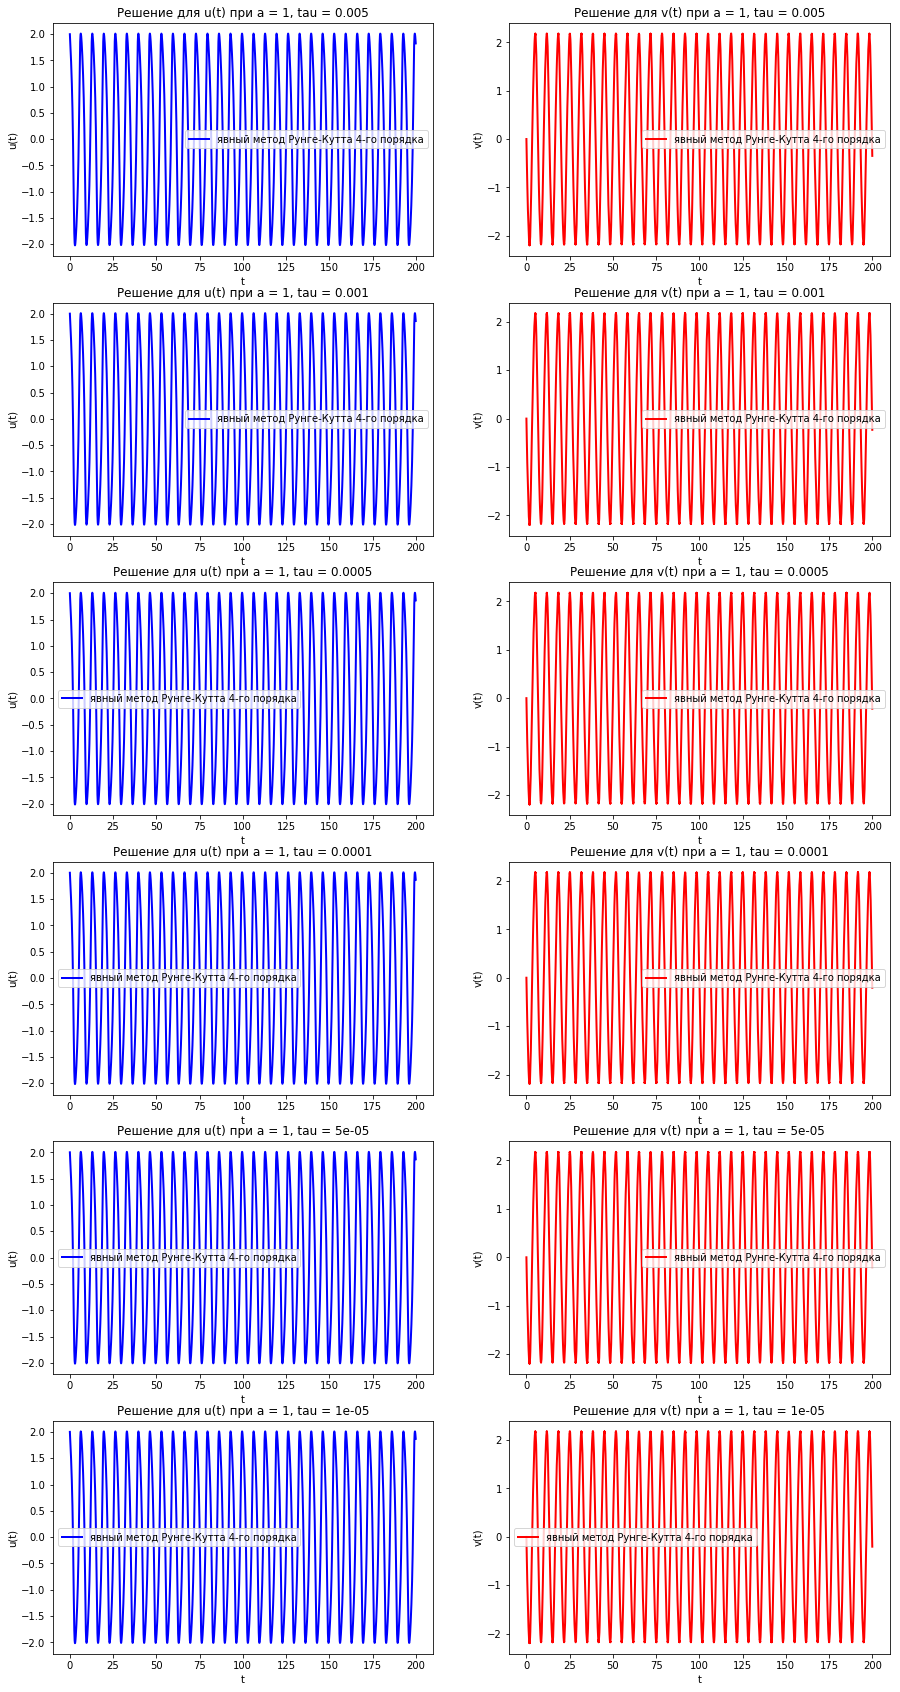

In [9]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# Different taus
taus = [5*10**-3, 10**-3, 5*10**-4, 10**-4, 5*10**-5, 10**-5]  # use only tau <= 5*10**-3 when a = 1 otherwise overflow error!

len_taus = len(taus)

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*len_taus #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
a = 1
A = 0.5
omega = 100

cycles = 1
for tau in taus:
    N = int((t_max - t_min) / tau)

    u = np.zeros(N)
    v = np.zeros(N)

    u[0] = 2
    v[0] = 0

    def f(u, v):
      return -a * (u**3 / 3 - u) + a * v

    def g(u, v, t):
      return -u + A * math.cos(omega * t)

    for i in range(0, N-1):
        t = (i + 1) * tau

        k_1 = f(u[i], v[i])
        k_2 = f(u[i] + tau / 2, v[i] + tau / 2 * k_1)
        k_3 = f(u[i] + tau / 2, v[i] + tau / 2 * k_2)
        k_4 = f(u[i] + tau, v[i] + tau * k_3)
        u[i+1] = u[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

        k_1 = g(u[i], v[i], t)
        k_2 = g(u[i] + tau / 2, v[i] + tau / 2 * k_1, t)
        k_3 = g(u[i] + tau / 2, v[i] + tau / 2 * k_2, t)
        k_4 = g(u[i] + tau, v[i] + tau * k_3, t)
        v[i+1] = v[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

    t = np.linspace(t_min, t_max, num=N)

    ax = plt.subplot(len_taus,2,cycles)
    plt.plot(t, u, color='blue', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    ax.legend()

    ax = plt.subplot(len_taus,2,cycles+1)
    plt.plot(t, v, color='red', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('v(t)')
    ax.legend()

    cycles += 2

plt.savefig('images/c/2.3.tau.png')

## 2.4. Уравнение Рэлея

г) Уравнение Рэлея:

\begin{equation*}
 x'' - a (1 - {x'}^2)x' + x = 0.
\end{equation*}

Используем явный метод Эйлера:

\begin{equation*}
 u_{k+1} = u_k + \tau \cdot f(x_k, y_k).
\end{equation*}

Исходную систему можно преобразовать к виду:

\begin{equation*}
 \begin{cases}
   x' = y,\\
   y' = a (1-y^2)y - x.
 \end{cases}
\end{equation*}

Сделаем замену: $u = x, v = x'$. Используем явный метод Рунге-Кутта 4-го порядка. Получили искомые формулы решения системы.

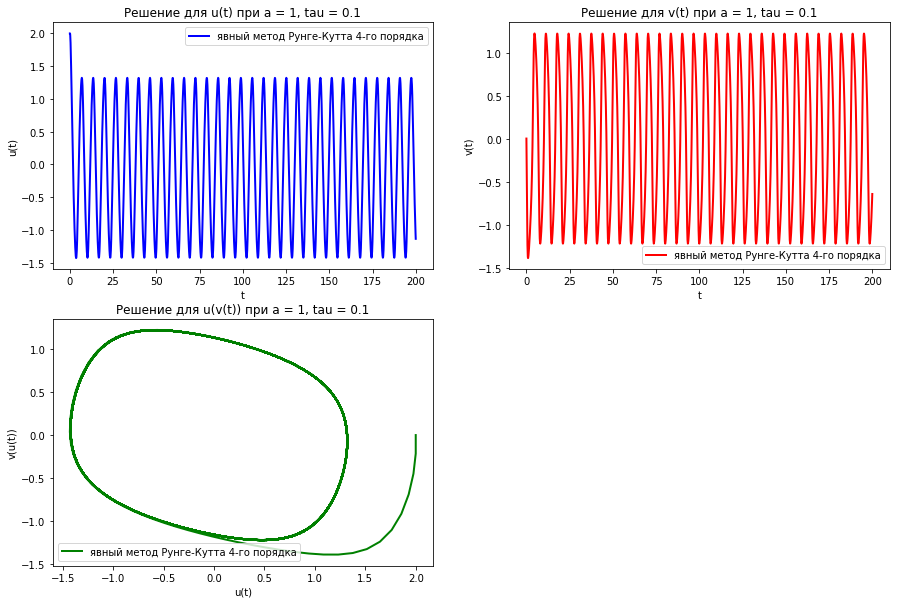

In [10]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*2 #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
a = 1
tau = 10**-1  # use only tau <= 5*10**-3 when a = 1 otherwise overflow error!

N = int((t_max - t_min) / tau)

u = np.zeros(N)
v = np.zeros(N)

u[0] = 2
v[0] = 0

def f(u, v):
  return v

def g(u, v):
  return a * (1 - v**2) * v - u

for i in range(0, N-1):
    k_1 = f(u[i], v[i])
    k_2 = f(u[i] + tau / 2, v[i] + tau / 2 * k_1)
    k_3 = f(u[i] + tau / 2, v[i] + tau / 2 * k_2)
    k_4 = f(u[i] + tau, v[i] + tau * k_3)
    u[i+1] = u[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
    
    k_1 = g(u[i], v[i])
    k_2 = g(u[i] + tau / 2, v[i] + tau / 2 * k_1)
    k_3 = g(u[i] + tau / 2, v[i] + tau / 2 * k_2)
    k_4 = g(u[i] + tau, v[i] + tau * k_3)
    v[i+1] = v[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)
    
t = np.linspace(t_min, t_max, num=N)

ax = plt.subplot(2,2,1)
plt.plot(t, u, color='blue', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
ax.set_xlabel('t')
ax.set_ylabel('u(t)')
ax.legend()

ax = plt.subplot(2,2,2)
plt.plot(t, v, color='red', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
ax.set_xlabel('t')
ax.set_ylabel('v(t)')
ax.legend()

ax = plt.subplot(2,2,3)
plt.plot(u, v, color='green', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
ax.set_title(f"Решение для u(v(t)) при a = {a}, tau = {tau}")
ax.set_xlabel('u(t)')
ax.set_ylabel('v(u(t))')
ax.legend()


plt.savefig('images/d/2.1.main.png')

#### Графики решений при различных $a$

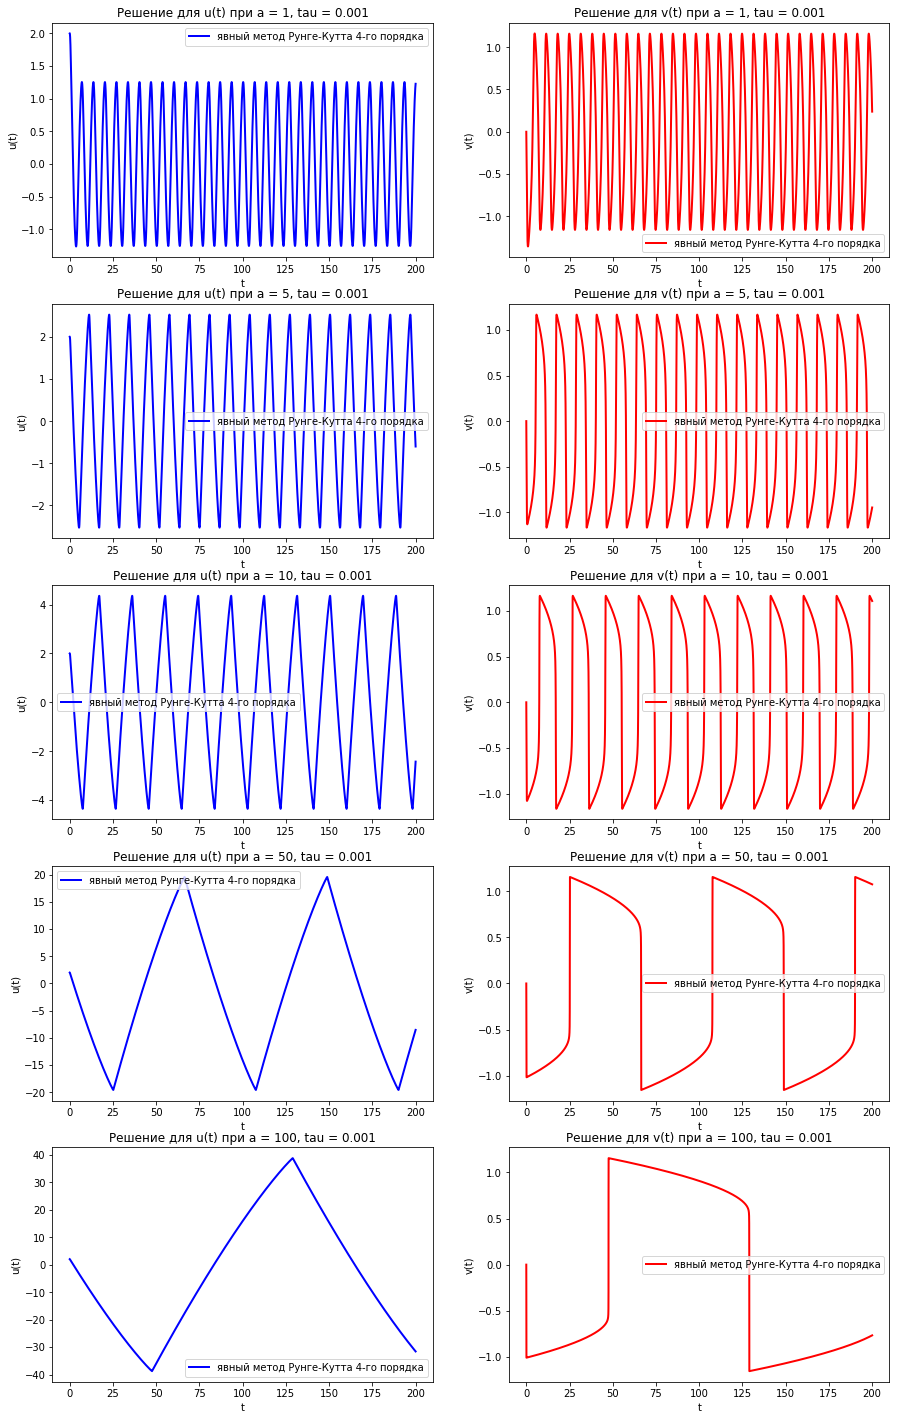

In [12]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# Different aas
aas = [10**0, 5*10**0, 10**1, 5*10**1, 10**2]

len_aas = len(aas)

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*len_aas #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
tau = 10**-3  # use only tau <= 5*10**-3 otherwise overflow error!

cycles = 1
for a in aas:
    N = int((t_max - t_min) / tau)

    u = np.zeros(N)
    v = np.zeros(N)

    u[0] = 2
    v[0] = 0
    
    def f(u, v):
      return v

    def g(u, v):
      return a * (1 - v**2) * v - u

    for i in range(0, N-1):
        k_1 = f(u[i], v[i])
        k_2 = f(u[i] + tau / 2, v[i] + tau / 2 * k_1)
        k_3 = f(u[i] + tau / 2, v[i] + tau / 2 * k_2)
        k_4 = f(u[i] + tau, v[i] + tau * k_3)
        u[i+1] = u[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

        k_1 = g(u[i], v[i])
        k_2 = g(u[i] + tau / 2, v[i] + tau / 2 * k_1)
        k_3 = g(u[i] + tau / 2, v[i] + tau / 2 * k_2)
        k_4 = g(u[i] + tau, v[i] + tau * k_3)
        v[i+1] = v[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

    t = np.linspace(t_min, t_max, num=N)

    ax = plt.subplot(len_aas,2,cycles)
    plt.plot(t, u, color='blue', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    ax.legend()

    ax = plt.subplot(len_aas,2,cycles+1)
    plt.plot(t, v, color='red', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('v(t)')
    ax.legend()

    cycles += 2

plt.savefig('images/d/2.2.a.png')

#### Графики решений при различных $\tau$

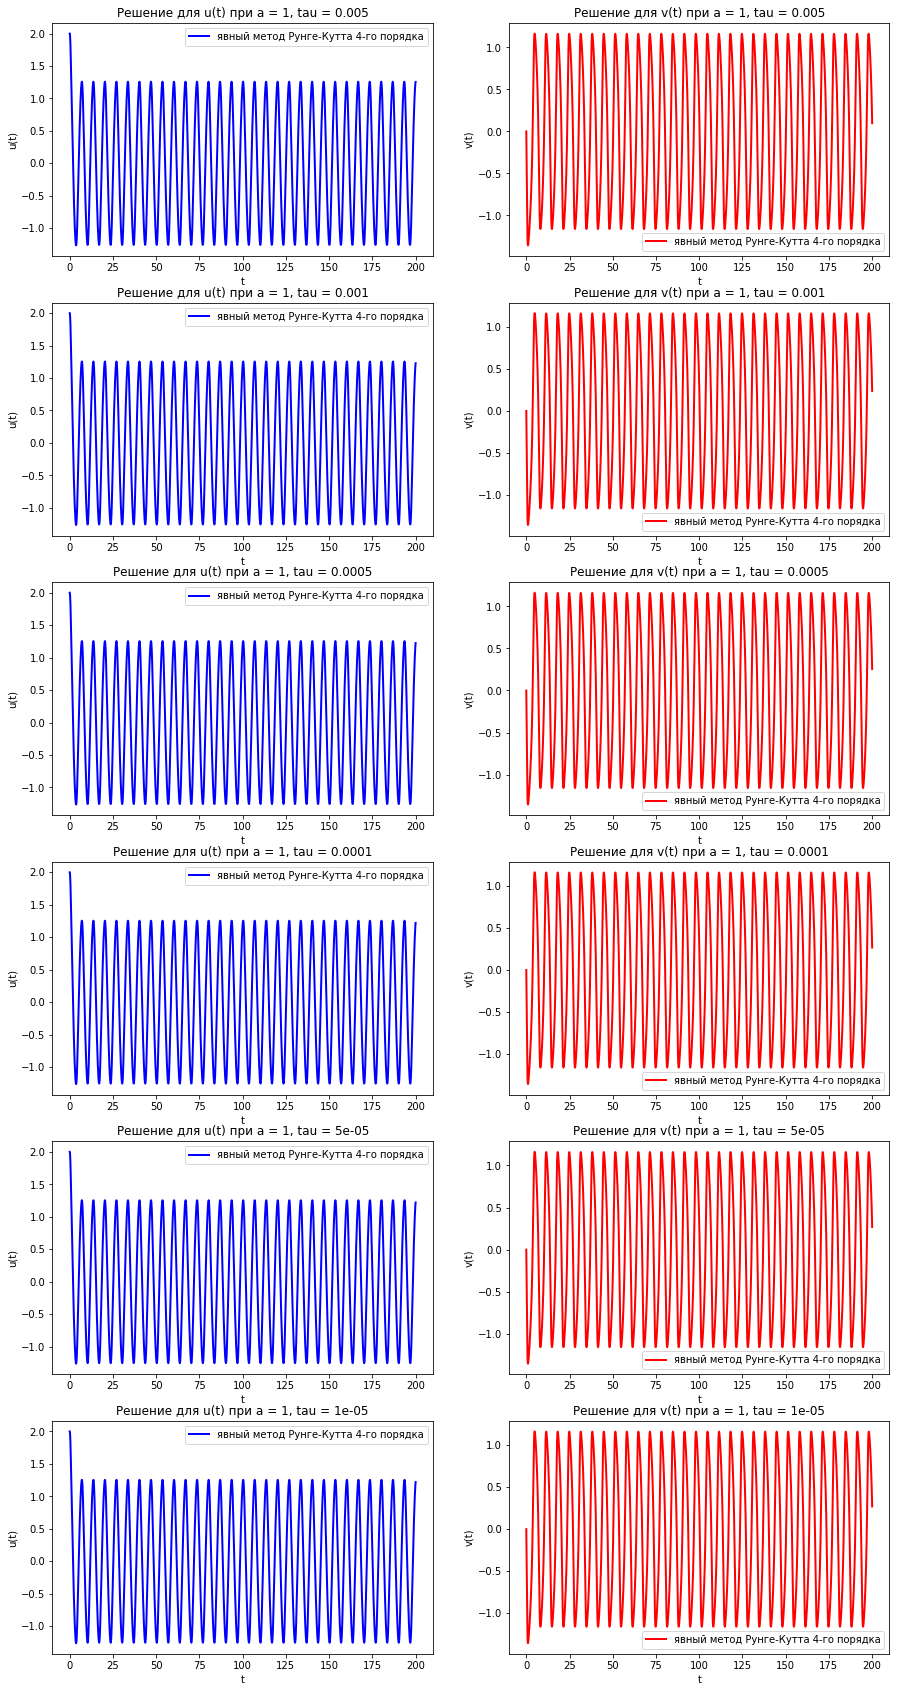

In [13]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import math

# Different taus
taus = [5*10**-3, 10**-3, 5*10**-4, 10**-4, 5*10**-5, 10**-5]  # use only tau <= 5*10**-3 when a = 1 otherwise overflow error!

len_taus = len(taus)

# drawing improvements
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15 #width
fig_size[1] = 5*len_taus #height
plt.rcParams["figure.figsize"] = fig_size

# constants
t_min = 0
t_max = 200

# variables
a = 1

cycles = 1
for tau in taus:
    N = int((t_max - t_min) / tau)

    u = np.zeros(N)
    v = np.zeros(N)

    u[0] = 2
    v[0] = 0
    
    def f(u, v):
      return v

    def g(u, v):
      return a * (1 - v**2) * v - u

    for i in range(0, N-1):
        k_1 = f(u[i], v[i])
        k_2 = f(u[i] + tau / 2, v[i] + tau / 2 * k_1)
        k_3 = f(u[i] + tau / 2, v[i] + tau / 2 * k_2)
        k_4 = f(u[i] + tau, v[i] + tau * k_3)
        u[i+1] = u[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

        k_1 = g(u[i], v[i])
        k_2 = g(u[i] + tau / 2, v[i] + tau / 2 * k_1)
        k_3 = g(u[i] + tau / 2, v[i] + tau / 2 * k_2)
        k_4 = g(u[i] + tau, v[i] + tau * k_3)
        v[i+1] = v[i] + tau / 6 * (k_1 + 2 * k_2 + 2 * k_3 + k_4)

    t = np.linspace(t_min, t_max, num=N)

    ax = plt.subplot(len_taus,2,cycles)
    plt.plot(t, u, color='blue', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для u(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('u(t)')
    ax.legend()

    ax = plt.subplot(len_taus,2,cycles+1)
    plt.plot(t, v, color='red', label='явный метод Рунге-Кутта 4-го порядка', linewidth=2.0)
    ax.set_title(f"Решение для v(t) при a = {a}, tau = {tau}")
    ax.set_xlabel('t')
    ax.set_ylabel('v(t)')
    ax.legend()

    cycles += 2

plt.savefig('images/d/2.3.tau.png')